###### BUSINESS UNDERSTANDING 
Business Question: 

Should a loan be approved for this customer based on their profile and credit risk?

This is exactly how banks and fintechs phrase it.

Business Objective: 

Reduce loan defaults

Approve loans for creditworthy customers

Support data-driven lending decisions

* Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# load data
data = pd.read_csv("Loan Eligibility Prediction.csv") 

data.head()


,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [11]:
# Creating checkpoint

df  = data.copy()

Basic Data Inspection

In [13]:
df.shape

(614, 13)

###### Observation
614 rows

13 columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


###### Observation
No missing values

Correct data types

Dataset is clean and ready

* Target Variable Distribution

In [14]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [15]:
# percentage
df['Loan_Status'].value_counts(normalize=True) * 100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

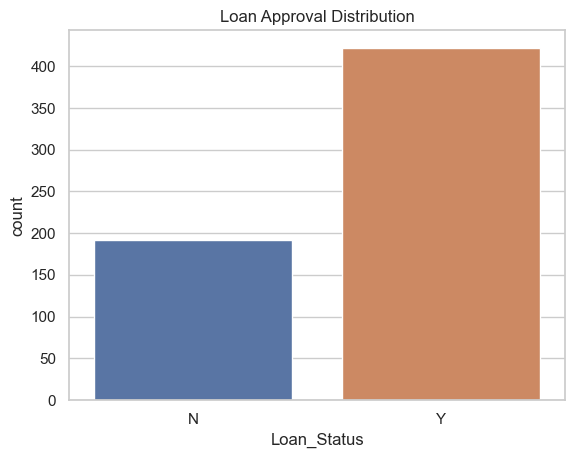

In [16]:
# Visualization
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Distribution")
plt.show()

###### Insight
There is a higher percentage of approved loans than disapproved loans.

* Numerical Analysis

In [17]:
# Summary statistics
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


* Income vs Loan status

In [18]:
loan_income = df.groupby("Loan_Status")["Applicant_Income"].sum().sort_values().to_frame()
loan_income

,Applicant_Income
Loan_Status,
N,1045647
Y,2272077


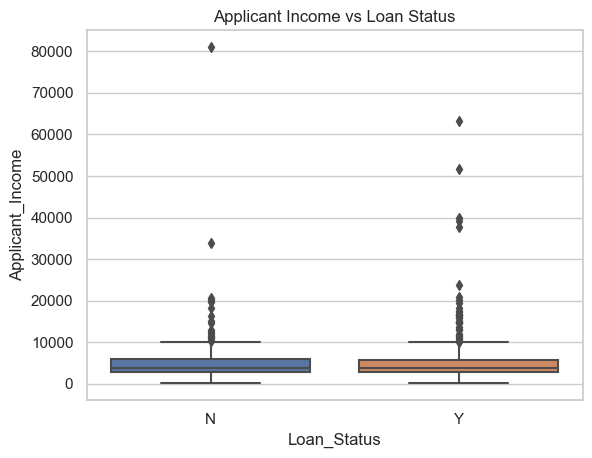

In [19]:
sns.boxplot(x='Loan_Status', y='Applicant_Income', data=df)
plt.title("Applicant Income vs Loan Status")
plt.show()


###### Key Observations
Similar Medians: The median income (the horizontal line inside the boxes) is roughly the same for both those who were denied (N) and those who were approved (Y). This suggests that, on average, income alone is not a definitive predictor of loan approval in this dataset.

Income Distribution: For both groups, the bulk of the data (the "boxes") is concentrated below 10,000. This indicates that most applicants fall into a similar lower-to-middle income bracket regardless of the outcome.

Presence of Outliers: Both categories show a significant number of outliers (the black diamonds).

The "Denied" (N) group has a very high extreme outlier above 80,000.

The "Approved" (Y) group has several high outliers between 40,000 and 65,000.

* Loan Amount vs Loan Status

In [21]:
loan_income = df.groupby("Loan_Status")["Loan_Amount"].sum().sort_values().to_frame()
loan_income

,Loan_Amount
Loan_Status,
N,27623
Y,59579


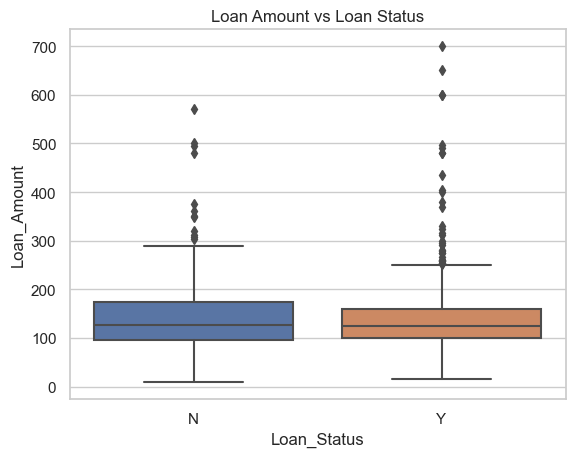

In [20]:
sns.boxplot(x='Loan_Status', y='Loan_Amount', data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()

###### Insights
The data suggests that the Loan Amount requested is not a strong standalone predictor for whether a loan will be approved or denied.

* Categorical Feature Analysis

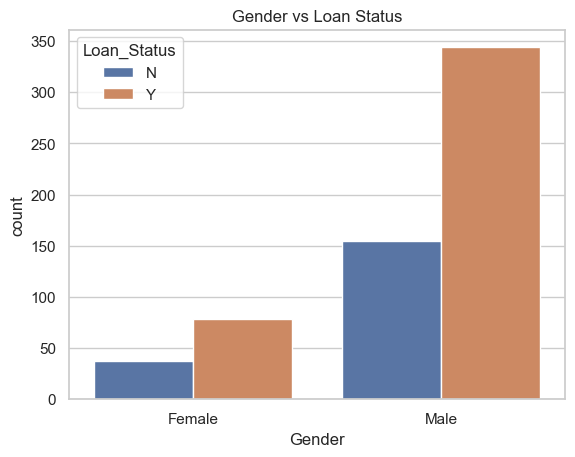

In [22]:
# Gender
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title("Gender vs Loan Status")
plt.show()


###### Insight
Demographics: Male applicants vastly outnumber female applicants in the dataset.

Approval Trends: Both genders maintain a similar success ratio, with approvals (Y) being roughly double the number of denials (N).

Totals: Over 340 males were approved compared to approximately 75+ females

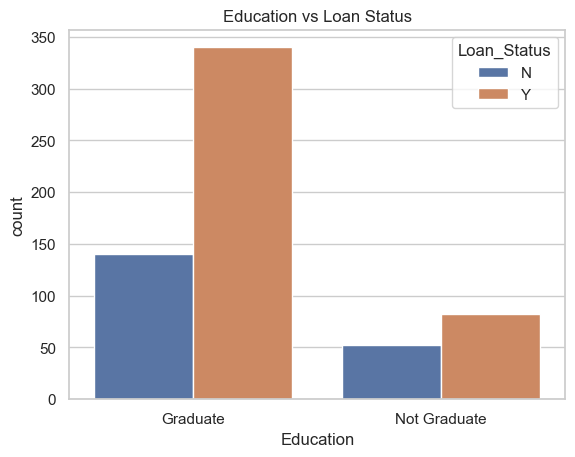

In [23]:
# Education

sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")
plt.show()

###### Insight

Total Volume: Graduate applicants significantly outnumber those who are not graduates in this dataset.

Graduate Outcomes: Approximately 340 graduates received loan approvals (Y), while roughly 140 were denied (N).

Non-Graduate Outcomes: For those who did not graduate, roughly 80 loans were approved (Y) and about 50 were denied (N).

Approval Rate: Graduates appear to have a higher success rate for loan approvals compared to non-graduates.

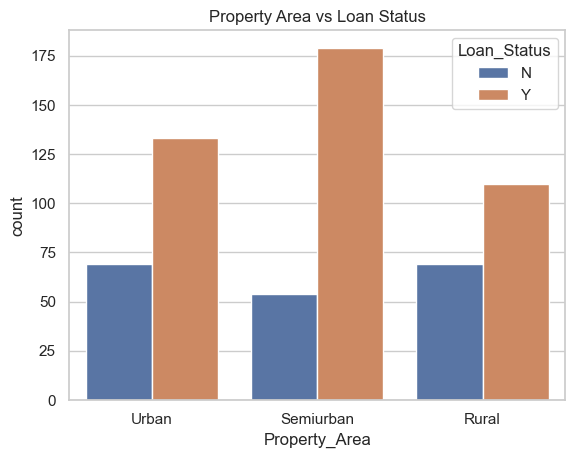

In [24]:
# Propert Area

sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Property Area vs Loan Status")
plt.show()

###### Insight

Semiurban Success: Applicants in semiurban areas have the highest number of approvals, with nearly 180 successful loans.

Approval Rates: Semiurban properties also show the highest approval-to-denial ratio, with only about 50 denials compared to the high volume of approvals.

Urban and Rural Comparison: Urban and rural areas have a similar number of loan denials (approximately 70 each), but urban areas have a higher number of approvals (about 130) than rural areas (about 110).

Total Volume: Semiurban is the most common property area in this dataset, while Rural is the least common.

* Credict History

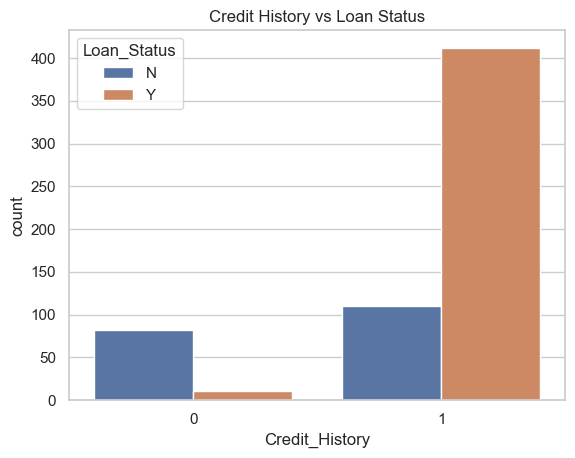

In [25]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Credit History vs Loan Status")
plt.show()

###### Insight

Positive History (1.0): Applicants with a credit history of 1.0 have a very high approval rate, with over 400 loans approved (Y) compared to approximately 100 denials (N).

Negative History (0.0): Applicants with a 0.0 credit history are almost always denied, with roughly 80 denials (N) and very few approvals.

Critical Factor: This chart displays the most distinct contrast in approval outcomes compared to other variables like gender or education.

* Correlational Analysis

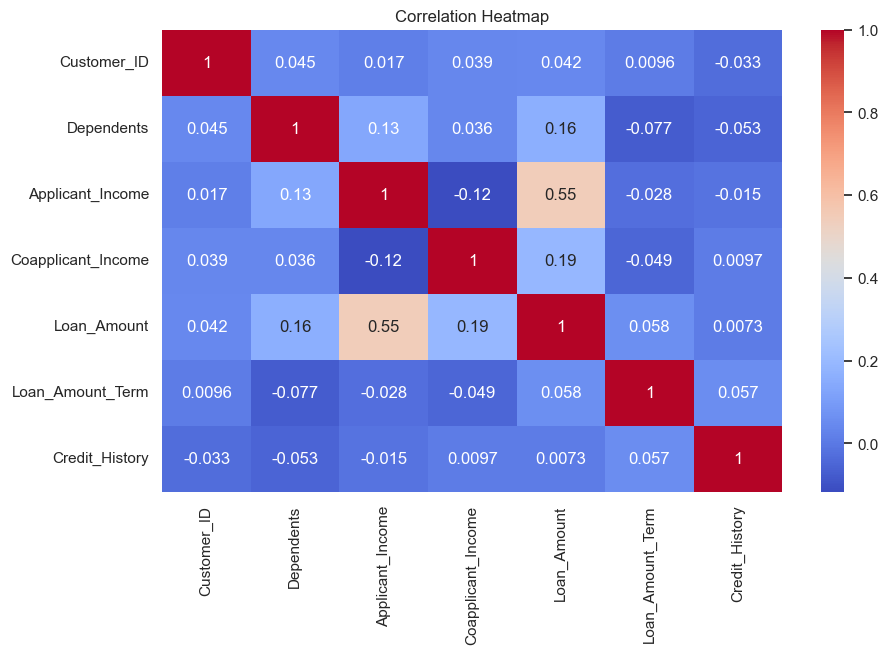

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

###### Insight

Strong Positive Correlation: LoanAmount and ApplicantIncome have a strong relationship ($0.57$), meaning higher-income applicants typically request larger loans.Moderate Positive Correlation: LoanAmount also correlates moderately with CoapplicantIncome ($0.19$).

Weak/NegligibleCorrelations:Credit_History shows almost no linear relationship with income or loan amount (values near $0.00$).Loan_Amount_Term has a weak negative correlation with both CoapplicantIncome ($-0.06$) and LoanAmount ($-0.05$).

Perfect Correlation: The diagonal line of $1.0$ represents each variable's perfect correlation with itself.